In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Datasets/bupa.csv')
data.shape

(344, 7)

<Axes: >

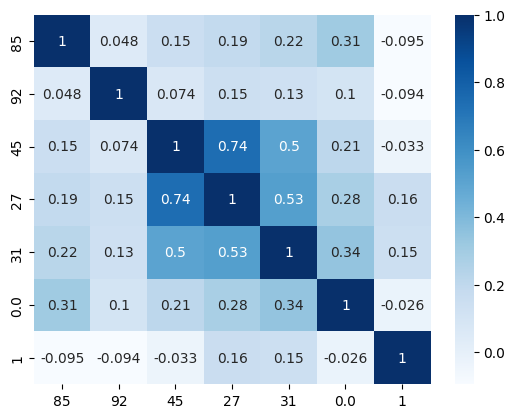

In [4]:
sns.heatmap(data.corr(), cmap='Blues', annot=True)

In [5]:
X = data.iloc[:,[2,3]].values

/home/lionex/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/lionex/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/lionex/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/lionex/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

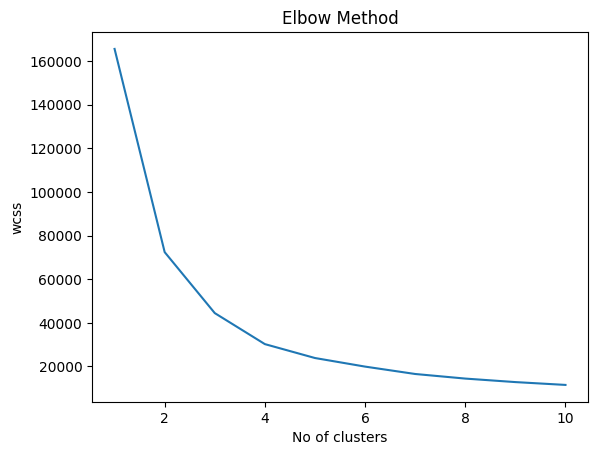

In [6]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11),wcss)
plt.title('Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('wcss')
plt.show() 

In [7]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_predict = kmeans.fit_predict(X)

/home/lionex/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


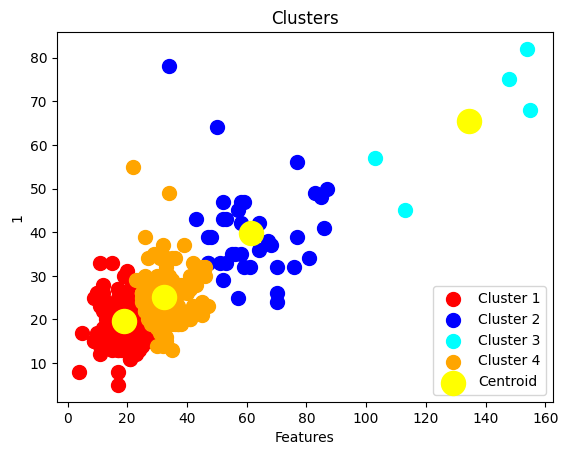

In [8]:
plt.scatter(X[y_predict == 0, 0], X[y_predict == 0, 1], s = 100, c ='red', label = 'Cluster 1')
plt.scatter(X[y_predict == 1, 0], X[y_predict == 1, 1], s = 100, c ='blue', label = 'Cluster 2')
plt.scatter(X[y_predict == 2, 0], X[y_predict == 2, 1], s = 100, c ='cyan', label = 'Cluster 3')
plt.scatter(X[y_predict == 3, 0], X[y_predict == 3, 1], s = 100, c ='orange', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 300, c='yellow', label='Centroid')
plt.title('Clusters')
plt.xlabel('Features')
plt.ylabel('1')
plt.legend()
plt.show()